---

### Lista de encabezados

1. Piezas del Vehículo:
        1: "Antiniebla delantero derecho",
        2: "Antiniebla delantero izquierdo",
        3: "Capó",
        4: "Cerradura capo",
        5: "Cerradura maletero",
        6: "Cerradura puerta",
        7: "Espejo lateral derecho",
        8: "Espejo lateral izquierdo",
        9: "Faros derecho",
        10: "Faros izquierdo",
        11: "Guardabarros delantero derecho",
        12: "Guardabarros delantero izquierdo",
        13: "Guardabarros trasero derecho",
        14: "Guardabarros trasero izquierdo",
        15: "Luz indicadora delantera derecha",
        16: "Luz indicadora delantera izquierda",
        17: "Luz indicadora trasera derecha",
        18: "Luz indicadora trasera izquierda",
        19: "Luz trasera derecho",
        20: "Luz trasera izquierdo",
        21: "Maletero",
        22: "Manija derecha",
        23: "Manija izquierda",
        24: "Marco de la ventana",
        25: "Marco de las puertas",
        26: "Moldura capó",
        27: "Moldura puerta delantera derecha",
        28: "Moldura puerta delantera izquierda",
        29: "Moldura puerta trasera derecha",
        30: "Moldura puerta trasera izquierda",
        31: "Parabrisas delantero",
        32: "Parabrisas trasero",
        33: "Parachoques delantero",
        34: "Parachoques trasero",
        35: "Puerta delantera derecha",
        36: "Puerta delantera izquierda",
        37: "Puerta trasera derecha",
        38: "Puerta trasera izquierda",
        39: "Rejilla, parrilla",
        40: "Rueda",
        41: "Tapa de combustible",
        42: "Tapa de rueda",
        43: "Techo",
        44: "Techo corredizo",
        45: "Ventana delantera derecha",
        46: "Ventana delantera izquierda",
        47: "Ventana trasera derecha",
        48: "Ventana trasera izquierda",
        49: "Ventanilla delantera derecha",
        50: "Ventanilla delantera izquierda",
        51: "Ventanilla trasera derecha",
        52: "Ventanilla trasera izquierda"

2. Tipos de Daño:
        1: "Abolladura",
        2: "Deformación",
        3: "Desprendimiento",
        4: "Fractura",
        5: "Rayón",
        6: "Rotura"

3. Sugerencia:
        1:"Reparar", 
        2:"Reemplazar"

# Librerias necesarias:

    !pip install --upgrade pip
    !pip install pandas
    !pip install scikit-learn
    !pip install imblearn
    !pip install iterative-stratification
    !pip install matplotlib
    
    !pip install scikit-multilearn
    !pip install liac-arff


In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from imblearn.over_sampling import SMOTE
import logging
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
# Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [7]:
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

- Limpieza de texto (minúsculas, eliminar espacios)
- Manejo de valores compuestos (ej. "Abolladura-dent")
- Manejo de errores y valores no encontrados

In [ ]:
# Data preparation: reading and encoding
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145.csv', sep='|')

def limpiar_texto(texto):
    """
    Limpia y estandariza el texto para comparación.
    Parámetros:
    texto (str): Texto a limpiar.
    Retorna:
    str: Texto en minúsculas y sin espacios al inicio o final. Si el texto es NaN, retorna cadena vacía.
    Uso:
    Se utiliza para normalizar cadenas antes de compararlas o mapearlas.
    """
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """
    Procesa la columna "Tipos de Daño" para manejar valores compuestos (ejemplo: "Abolladura-dent").
    Parámetros:
    texto (str): Texto del tipo de daño.
    Retorna:
    str: La parte principal del daño antes del guion, o el texto original si no contiene guion.
    Uso:
    Normaliza los valores de daño para facilitar el mapeo.
    """
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """
    Mapea un texto a un valor numérico usando un diccionario, con manejo de errores.
    Parámetros:
    texto (str): Texto a mapear.
    diccionario (dict): Diccionario de mapeo texto -> número.
    columna (str): Nombre de la columna para aplicar reglas específicas (ej. "Tipos de Daño").
    Retorna:
    int: Valor numérico correspondiente o -1 si no se encuentra o hay error.
    Uso:
    Codifica las etiquetas de texto en valores numéricos para procesamiento.
    """
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)   # -1 para valores no encontrados
    except Exception as e:
        logger.error(f"Error procesando valor: {texto} - {str(e)}")
        return -1

# Apply mappings
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

Consolida las etiquetas y genera el encode.

        Imagen	dannos	partes	sugerencias
    0	1.jpg	[1]	[11]	[1]
    1	10.jpg	[6]	[31]	[2]
    2	100.jpg	[2, 6, 6]	[11, 9, 33]	[1, 2, 1]
    3	1000.jpg	[5]	[33]	[1]
    4	1001.jpg	[1, 4, 6]	[21, 34, 20]	[1, 1, 2]

In [ ]:
# Consolidate labels by image
def consolidar_etiquetas(group):
    """
    Consolida etiquetas de daños, partes y sugerencias agrupadas por imagen.
    Parámetros:
    group (DataFrame): Grupo de filas correspondiente a una imagen.
    Retorna:
    pd.Series: Serie con listas de etiquetas consolidadas para 'dannos', 'partes' y 'sugerencias'.
    Uso:
    Agrupa etiquetas para cada imagen en listas para facilitar el manejo multi-etiqueta.
    """
    result = {'dannos': [], 'partes': [], 'sugerencias': []}
    for col in result.keys():
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    return pd.Series(result)

df_encoded = df.rename(columns={
    'Tipos de Daño_encoded': 'dannos',
    'Piezas del Vehículo_encoded': 'partes',
    'Sugerencia_encoded': 'sugerencias'
})

df_consolidado_encoded = df_encoded.groupby('Imagen', group_keys=False)[['dannos', 'partes', 'sugerencias']].apply(consolidar_etiquetas).reset_index()

def convert_string_lists(df):
    """
    Convierte columnas con listas en formato string a listas reales de Python.
    Parámetros:
    df (DataFrame): DataFrame con columnas a convertir.
    Retorna:
    DataFrame: DataFrame con columnas convertidas.
    Uso:
    Prepara los datos para procesamiento posterior asegurando el tipo correcto.
    """
    for col in ['dannos', 'partes', 'sugerencias']:
        if df[col].dtype == object and isinstance(df[col].iloc[0], str):
            df[col] = df[col].apply(ast.literal_eval)
    return df

multi_consolidado_encoded = convert_string_lists(df_consolidado_encoded)

# Guardar el nuevo archivo CSV
df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', index=False, sep='|')

Guarda el archivo agrupados por etiquetas

    Imagen|Tipos de Daño|Piezas del Vehículo|Sugerencia
    1.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    10.jpg|['Rotura']|['Parabrisas delantero']|['Reemplazar']
    100.jpg|['Deformación', 'Rotura', 'Rotura']|['Guardabarros delantero derecho ', 'Faros derecho', 'Parachoques delantero']|['Reparar', 'Reemplazar', 'Reparar']
    1000.jpg|['Rayón']|['Parachoques delantero']|['Reparar']
    1001.jpg|['Abolladura', 'Fractura', 'Rotura']|['Maletero', 'Parachoques trasero', 'Luz trasera izquierdo']|['Reparar', 'Reparar', 'Reemplazar']
    1002.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    1003.jpg|['Desprendimiento', 'Rayón']|['Parachoques delantero', 'Faros derecho']|['Reemplazar', 'Reemplazar']
    1004.jpg|['Fractura', 'Rayón']|['Luz trasera derecho', 'Parachoques trasero']|['Reemplazar', 'Reparar']


In [11]:
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_etiquetas = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)
# Guardar el nuevo archivo CSV
df_consolidado_etiquetas.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas.csv', index=False, sep='|')

---
Opcional

Buscar etiquetas con menos de 10 ejemplos

In [ ]:
def analyze_multilabel_class_distribution(y, class_names=None):
    """
    Analiza y grafica la distribución de clases en una matriz binaria multilabel.
    Parámetros:
    y (numpy array): Matriz binaria de etiquetas multilabel (n_samples, n_classes).
    class_names (list, opcional): Nombres de las clases.
    Retorna:
    None (imprime y grafica resultados).
    Uso:
    Identifica clases con pocas muestras para análisis y balanceo.
    """
    # Sum occurrences of each class
    class_counts = np.sum(y, axis=0)
    if class_names is None:
        class_names = [f"Class_{i}" for i in range(y.shape[1])]

    # Create a sorted list of (class_name, count)
    sorted_counts = sorted(zip(class_names, class_counts), key=lambda x: x[1])

    # Print classes with low counts
    print("Classes with low sample counts:")
    for cls, count in sorted_counts:
        if count < 10:  # Threshold for rarity, adjust as needed
            print(f"{cls}: {count} samples")

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.bar([cls for cls, _ in sorted_counts], [count for _, count in sorted_counts])
    plt.xticks(rotation=90)
    plt.title("Multi-label Class Distribution")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()

Classes with low sample counts:
17: 1 samples
18: 1 samples
22: 1 samples
29: 1 samples
50: 1 samples
30: 2 samples
51: 2 samples
28: 3 samples
23: 4 samples
27: 4 samples
45: 4 samples
48: 4 samples
1: 5 samples
8: 5 samples
24: 5 samples
46: 5 samples
7: 6 samples
16: 6 samples
43: 6 samples
47: 6 samples
52: 6 samples
2: 7 samples
15: 9 samples


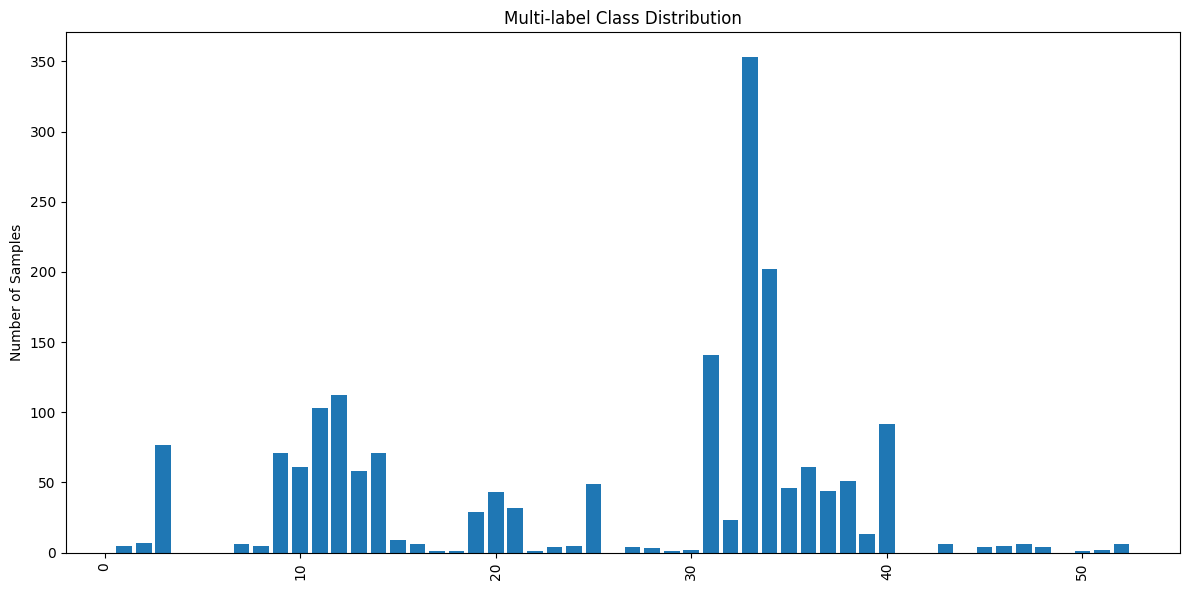

In [14]:
# Assuming your label data is in multi_consolidado_encoded['partes'] or similar
mlb = MultiLabelBinarizer()
combined_labels = mlb.fit_transform(multi_consolidado_encoded['partes'])  # or your combined multi-label matrix

analyze_multilabel_class_distribution(combined_labels, class_names=mlb.classes_)

Se necesitan mas images con las siguientes clases:

    17: Luz indicadora trasera derecha
    18: Luz indicadora trasera izquierda
    22: Manija derecha
    29: Moldura puerta trasera derecha
    50: Ventanilla delantera izquierda
    30: Moldura puerta trasera izquierda
    51: Ventanilla trasera derecha
    28: Moldura puerta delantera izquierda
    23: Manija izquierda
    27: Moldura puerta delantera derecha
    45: Ventana delantera derecha
    48: Ventana trasera izquierda
    1: Antiniebla delantero derecho
    8: Espejo lateral izquierdo
    24: Marco de la ventana
    46: Ventana delantera izquierda
    7: Espejo lateral derecho
    16: Luz indicadora delantera izquierda
    43: Techo
    47: Ventana trasera derecha
    52: Ventanilla trasera izquierda
    2: Antiniebla delantero izquierdo
    15: Luz indicadora delantera derecha

- At least 20-30 samples per class for simple models or initial experiments.
- 50-100 samples per class for more robust training and better generalization.
- More samples are always better, especially for deep learning models.

---
Trabajando con las clases raras u otras

1. Código para Procesamiento y Agrupamiento

In [15]:
# Configuración
UMBRAL_PARTES = 10  # Mínimo de muestras para no ser considerada rara
UMBRAL_DANOS = 5    # Mínimo de muestras para daños
CLASE_AGRUPADA = 999  # ID para la categoría "Otras"

def cargar_y_preparar_datos(ruta_encoded):
    """Carga y prepara los datos ya codificados"""
    df = pd.read_csv(ruta_encoded, sep='|')
    
    # Convertir strings de listas a listas reales
    for col in ['dannos', 'partes', 'sugerencias']:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    return df

def identificar_clases_raras(series_etiquetas, umbral):
    """Identifica clases con menos muestras que el umbral"""
    todas_etiquetas = [label for sublist in series_etiquetas for label in sublist]
    conteo = Counter(todas_etiquetas)
    return {cls for cls, count in conteo.items() if count < umbral}

def agrupar_clases_raras(etiquetas, clases_raras):
    """Reemplaza clases raras por la clase agrupada"""
    return [CLASE_AGRUPADA if label in clases_raras else label for label in etiquetas]

def procesar_y_agrupar(ruta_entrada, ruta_salida):
    """Proceso completo de agrupamiento de clases raras"""
    # Cargar datos
    df = cargar_y_preparar_datos(ruta_entrada)
    
    # Identificar clases raras
    clases_raras_piezas = identificar_clases_raras(df['partes'], UMBRAL_PARTES)
    clases_raras_danos = identificar_clases_raras(df['dannos'], UMBRAL_DANOS)
    
    print(f"Partes raras agrupadas: {clases_raras_piezas}")
    print(f"Daños raros agrupados: {clases_raras_danos}")
    
    # Aplicar agrupamiento
    df['partes'] = df['partes'].apply(lambda x: agrupar_clases_raras(x, clases_raras_piezas))
    df['dannos'] = df['dannos'].apply(lambda x: agrupar_clases_raras(x, clases_raras_danos))
    
    # Guardar resultados
    df.to_csv(ruta_salida, index=False, sep='|')
    return df

# Ejecutar el procesamiento
ruta_encoded = 'data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv'
ruta_salida = 'data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded_agrupado.csv'

df_agrupado = procesar_y_agrupar(ruta_encoded, ruta_salida)

Partes raras agrupadas: {1, 2, 7, 8, 15, 16, 17, 18, 22, 23, 24, 27, 28, 29, 30, 43, 45, 46, 47, 48, 50, 51, 52}
Daños raros agrupados: set()


2. Análisis de Distribución Mejorado


Clases de partes con menos de 10 muestras:


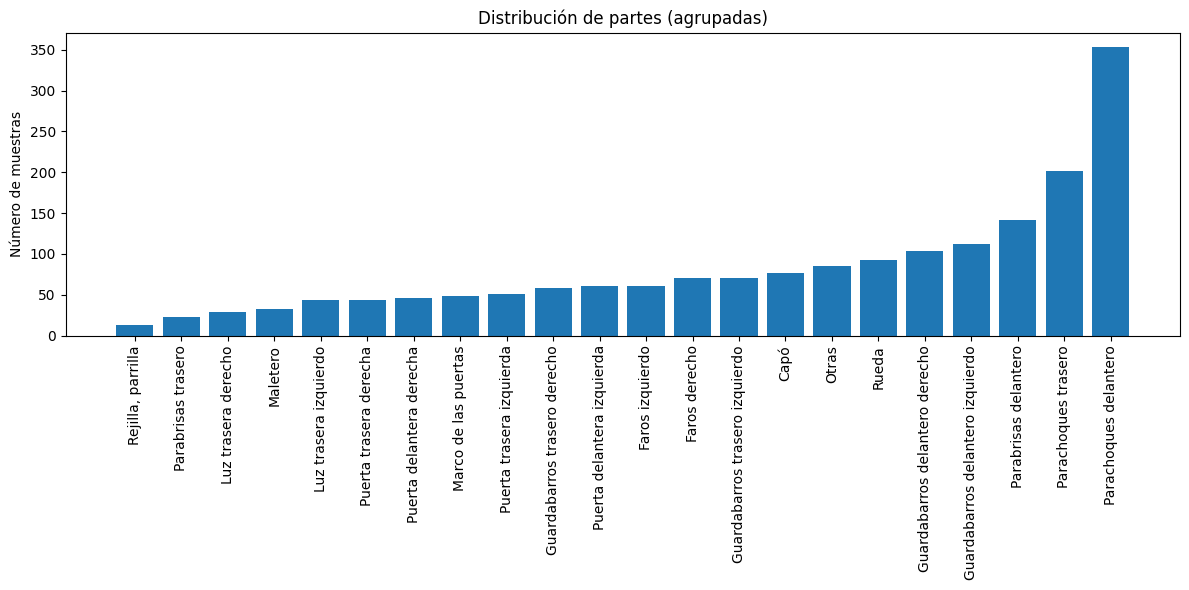


Clases de dannos con menos de 5 muestras:


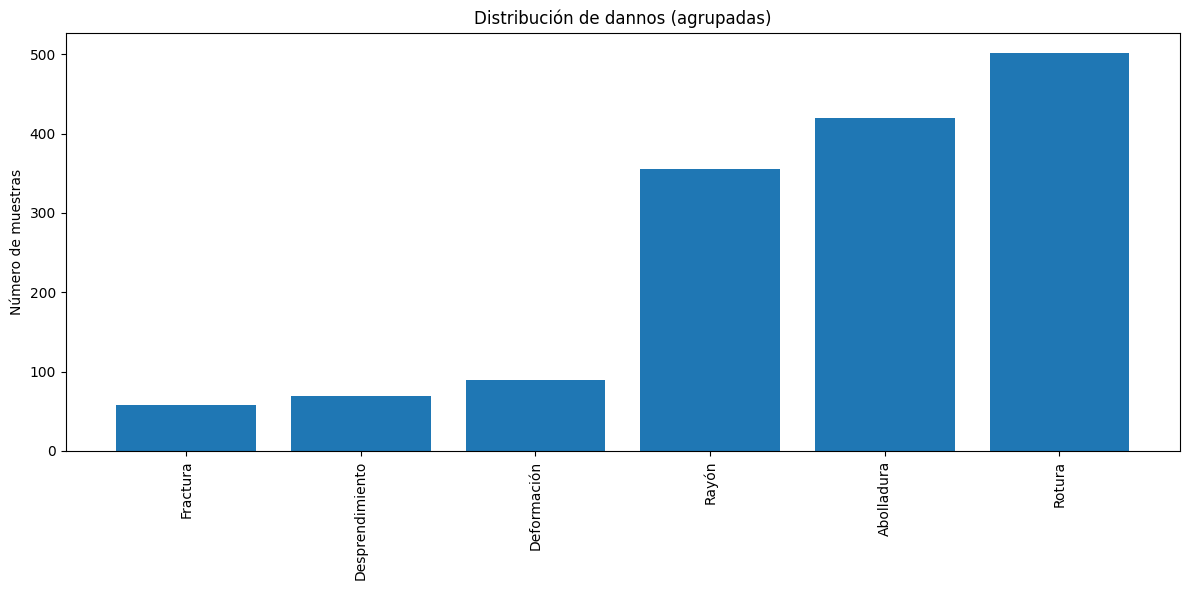

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MultiLabelBinarizer

def analizar_distribucion(df, tipo='partes'):
    """Analiza y muestra la distribución de clases"""
    mlb = MultiLabelBinarizer()
    matriz_binaria = mlb.fit_transform(df[tipo])
    
    # Obtener nombres de clases (usando el diccionario global)
    if tipo == 'partes':
        nombres_clases = [label_to_cls_piezas.get(i, "Otras") for i in mlb.classes_]
    else:
        nombres_clases = [label_to_cls_danos.get(i, "Otros") for i in mlb.classes_]
    
    # Calcular conteos
    conteos = np.sum(matriz_binaria, axis=0)
    
    # Ordenar de menor a mayor
    indices_ordenados = np.argsort(conteos)
    conteos_ordenados = conteos[indices_ordenados]
    nombres_ordenados = [nombres_clases[i] for i in indices_ordenados]
    
    # Mostrar clases con pocas muestras
    print(f"\nClases de {tipo} con menos de {UMBRAL_PARTES if tipo=='partes' else UMBRAL_DANOS} muestras:")
    for nombre, conteo in zip(nombres_ordenados, conteos_ordenados):
        if conteo < (UMBRAL_PARTES if tipo=='partes' else UMBRAL_DANOS):
            print(f"{nombre}: {conteo} muestras")
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.bar(nombres_ordenados, conteos_ordenados)
    plt.xticks(rotation=90)
    plt.title(f"Distribución de {tipo} (agrupadas)")
    plt.ylabel("Número de muestras")
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
analizar_distribucion(df_agrupado, 'partes')
analizar_distribucion(df_agrupado, 'dannos')

3. Actualización de Diccionarios

In [17]:
# Actualizar diccionarios para incluir la clase agrupada
label_to_cls_piezas[CLASE_AGRUPADA] = "Otras partes"
cls_to_label_piezas["otras partes"] = CLASE_AGRUPADA

label_to_cls_danos[CLASE_AGRUPADA] = "Otros daños"
cls_to_label_danos["otros daños"] = CLASE_AGRUPADA

# Guardar diccionarios actualizados (opcional)
import json
with open('data/fotos_siniestros/diccionarios_actualizados.json', 'w') as f:
    json.dump({
        'label_to_cls_piezas': label_to_cls_piezas,
        'label_to_cls_danos': label_to_cls_danos,
        'cls_to_label_piezas': cls_to_label_piezas,
        'cls_to_label_danos': cls_to_label_danos
    }, f, indent=2)

4. Código para Verificación

In [18]:
def verificar_agrupamiento(df_original, df_agrupado):
    """Compara los DataFrames antes y después del agrupamiento"""
    # Ejemplo: verificar cuántas clases únicas hay ahora
    partes_unicas_orig = {x for sublist in df_original['partes'] for x in sublist}
    partes_unicas_agrup = {x for sublist in df_agrupado['partes'] for x in sublist}
    
    print("\nVerificación de agrupamiento:")
    print(f"Clases únicas originales (partes): {len(partes_unicas_orig)}")
    print(f"Clases únicas después de agrupar: {len(partes_unicas_agrup)}")
    print(f"Clases agrupadas: {CLASE_AGRUPADA in partes_unicas_agrup}")

# Cargar datos originales
df_original = cargar_y_preparar_datos(ruta_encoded)
verificar_agrupamiento(df_original, df_agrupado)


Verificación de agrupamiento:
Clases únicas originales (partes): 44
Clases únicas después de agrupar: 22
Clases agrupadas: True


La clase 999 aparecerá en tus resultados como "Otras partes" o "Otros daños"

División de Datos para Entrenamiento, Validación y Pruebas

- La naturaleza multi-etiqueta de tus datos
- La distribución de clases (que ya has analizado)
- La necesidad de mantener proporciones similares en todos los conjuntos

Alternativa más Avanzada (Recomendada)

In [19]:
# Cargar los datos ya procesados
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded_agrupado.csv', sep='|')

In [ ]:
# Usar MultilabelStratifiedShuffleSplit para mejor estratificación
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Primera división: train (70%) y temp (30%)
for train_index, temp_index in msss.split(df['Imagen'], y_combined):
    X_train = df.iloc[train_index]['Imagen']
    X_temp = df.iloc[temp_index]['Imagen']
    y_temp_labels = y_combined[temp_index]

# Segunda división: val (15%) y test (15%)
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in msss.split(X_temp, y_temp_labels):
    X_val = X_temp.iloc[val_index]
    X_test = X_temp.iloc[test_index]

# Crear DataFrames
train_df = df[df['Imagen'].isin(X_train)].copy()
val_df = df[df['Imagen'].isin(X_val)].copy()
test_df = df[df['Imagen'].isin(X_test)].copy()

# Verificar distribución
def check_distribution(df, name):
    print(f"\nDistribución en {name}:")
    for col in ['dannos', 'partes', 'sugerencias']:
        all_labels = [label for sublist in df[col] for label in sublist]
        print(f"{col}: {len(set(all_labels))} clases únicas, {len(all_labels)} etiquetas totales")

check_distribution(train_df, "Entrenamiento")
check_distribution(val_df, "Validación")
check_distribution(test_df, "Prueba")

Tamaño de los Conjuntos:

- 70% entrenamiento
- 15% validación (para ajuste de hiperparámetros)
- 15% prueba (solo para evaluación final)

Implementación Mejorada con Guardado de Metadatos

1. Reproducibilidad: Podrás recrear exactamente los mismos conjuntos en cualquier momento
2. Trazabilidad: Sabrás qué imágenes pertenecen a cada conjunto
3. Flexibilidad: Podrás cargar solo los conjuntos que necesites para cada fase

In [22]:
def convert_to_serializable(obj):
    """Convierte objetos numpy a tipos nativos de Python para serialización JSON"""
    if isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [convert_to_serializable(item) for item in obj]
    return obj

# 1. Cargar datos ya procesados
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded_agrupado.csv', sep='|')

# Convertir strings de listas a listas reales
for col in ['dannos', 'partes', 'sugerencias']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2. Preparar etiquetas para estratificación
mlb = MultiLabelBinarizer()
y_combined = np.hstack([
    mlb.fit_transform(df['dannos']),
    mlb.fit_transform(df['partes']),
    mlb.fit_transform(df['sugerencias'])
])

# 3. División estratificada
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, temp_index in msss.split(df, y_combined):
    train_df = df.iloc[train_index]
    temp_df = df.iloc[temp_index]

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
temp_labels = np.hstack([
    mlb.fit_transform(temp_df['dannos']),
    mlb.fit_transform(temp_df['partes']),
    mlb.fit_transform(temp_df['sugerencias'])
])
for val_index, test_index in msss.split(temp_df, temp_labels):
    val_df = temp_df.iloc[val_index]
    test_df = temp_df.iloc[test_index]

# 4. Crear directorios si no existen
Path('data/fotos_siniestros/train').mkdir(parents=True, exist_ok=True)
Path('data/fotos_siniestros/val').mkdir(parents=True, exist_ok=True)
Path('data/fotos_siniestros/test').mkdir(parents=True, exist_ok=True)

# 5. Guardar los conjuntos principales
train_df.to_csv('data/fotos_siniestros/train/train_set.csv', index=False, sep='|')
val_df.to_csv('data/fotos_siniestros/val/val_set.csv', index=False, sep='|')
test_df.to_csv('data/fotos_siniestros/test/test_set.csv', index=False, sep='|')

print(f"Total imágenes: {len(df)}")
print(f"Entrenamiento: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validación: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Prueba: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# 6. Guardar metadatos y clases raras
def get_rare_classes(df, column, threshold=5):
    all_labels = [label for sublist in df[column] for label in sublist]
    label_counts = pd.Series(all_labels).value_counts()
    return label_counts[label_counts < threshold].index.tolist()

# Modifica la creación del diccionario metadata para usar la función de conversión
metadata = {
    'split_parameters': {
        'test_size': 0.3,
        'val_size': 0.15,
        'random_state': 42,
        'stratify': True
    },
    'rare_classes': {
        'dannos': convert_to_serializable(get_rare_classes(df, 'dannos')),
        'partes': convert_to_serializable(get_rare_classes(df, 'partes')),
        'sugerencias': convert_to_serializable(get_rare_classes(df, 'sugerencias'))
    },
    'class_distribution': {
        'original': {
            'n_images': len(df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'train': {
            'n_images': len(train_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in train_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in train_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in train_df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'val': {
            'n_images': len(val_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in val_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in val_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in val_df['sugerencias'] for label in sublist).value_counts()))
            }
        },
        'test': {
            'n_images': len(test_df),
            'class_counts': {
                'dannos': convert_to_serializable(dict(pd.Series(label for sublist in test_df['dannos'] for label in sublist).value_counts())),
                'partes': convert_to_serializable(dict(pd.Series(label for sublist in test_df['partes'] for label in sublist).value_counts())),
                'sugerencias': convert_to_serializable(dict(pd.Series(label for sublist in test_df['sugerencias'] for label in sublist).value_counts()))
            }
        }
    }
}

# 7. Crear archivos de soporte para clases raras
def create_support_files(df, split_name):
    # Crear directorio si no existe
    os.makedirs(f'data/fotos_siniestros/{split_name}', exist_ok=True)
    
    rare_partes = get_rare_classes(df, 'partes')
    rare_dannos = get_rare_classes(df, 'dannos')
    
    support_data = {
        'rare_partes': rare_partes,
        'rare_partes_names': [label_to_cls_piezas.get(x, "Desconocido") for x in rare_partes],
        'rare_dannos': rare_dannos,
        'rare_dannos_names': [label_to_cls_danos.get(x, "Desconocido") for x in rare_dannos],
        'examples': {
            'partes': df[df['partes'].apply(lambda x: any(item in rare_partes for item in x))].head(5).to_dict('records'),
            'dannos': df[df['dannos'].apply(lambda x: any(item in rare_dannos for item in x))].head(5).to_dict('records')
        }
    }
    
    with open(f'data/fotos_siniestros/{split_name}/rare_classes_support.json', 'w') as f:
        json.dump(support_data, f, indent=2)

# Asegurarse que el directorio principal existe
os.makedirs('data/fotos_siniestros', exist_ok=True)

# Guardar metadatos
with open('data/fotos_siniestros/split_metadata.json', 'w') as f:
    json.dump(convert_to_serializable(metadata), f, indent=2)

# Crear archivos de soporte
create_support_files(train_df, 'train')
create_support_files(val_df, 'val')
create_support_files(test_df, 'test')

print("División completada y archivos guardados correctamente.")

Total imágenes: 1145
Entrenamiento: 801 (70.0%)
Validación: 171 (14.9%)
Prueba: 173 (15.1%)
División completada y archivos guardados correctamente.


Cargar los conjuntos:

In [23]:
train_df = pd.read_csv('data/fotos_siniestros/train/train_set.csv', sep='|')
val_df = pd.read_csv('data/fotos_siniestros/val/val_set.csv', sep='|')

Cargar metadatos:

In [24]:
with open('data/fotos_siniestros/split_metadata.json') as f:
    metadata = json.load(f)

Manejar clases raras:

In [25]:
with open('data/fotos_siniestros/train/rare_classes_support.json') as f:
    rare_classes = json.load(f)
    # Puedes usar esta información para aplicar pesos de clase o data augmentation

---